In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

In [2]:
Data=pd.read_csv('C://Users//91900//OneDrive//Desktop//Data//train.CSV')

In [3]:
Data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### <center>EDA

In [4]:
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


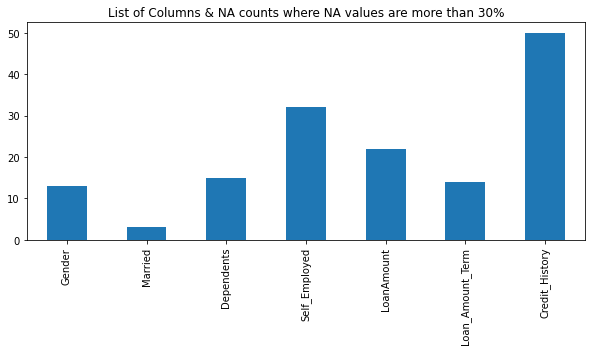

In [5]:
NA_col = Data.isnull().sum()
NA_col = NA_col[NA_col.values >(0*len(Data))]
plt.figure(figsize=(10,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [6]:
Data.isnull().sum()/Data.shape[0]*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:

Data['Gender'] = Data['Gender'].fillna(Data['Gender'].mode()[0])
Data['Married'] = Data['Married'].fillna(Data['Married'].mode()[0])
Data['Self_Employed'] = Data['Self_Employed'].fillna(Data['Self_Employed'].mode()[0])
Data['Dependents'] = Data['Dependents'].fillna(Data['Dependents'].mode()[0])
Data['LoanAmount'] = Data['LoanAmount'].fillna(Data['LoanAmount'].mean())
Data['Loan_Amount_Term'] = Data['Loan_Amount_Term'].fillna(Data['Loan_Amount_Term'].mean())
Data['Credit_History'] = Data['Credit_History'].fillna(Data['Credit_History'].mean())

In [8]:
Data.replace('3+',3,inplace=True)

In [9]:
Data['Dependents']=Data['Dependents'].astype(str).astype(int)

In [10]:
Data=Data.drop(['Loan_ID'],axis=1)

In [11]:
Data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [12]:
(Data.isnull().sum()/Data.shape[0]*100)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.3+ KB


### <center>Visualization

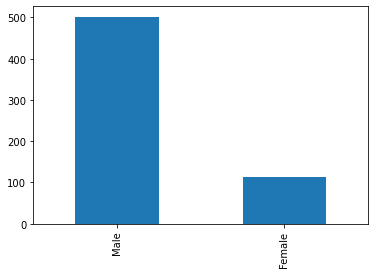

In [14]:
series = Data["Gender"].value_counts()

series.plot(kind='bar')
plt.show()

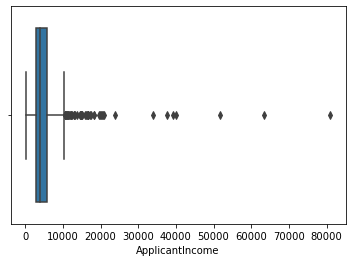

In [15]:
ax=sns.boxplot(x=Data["ApplicantIncome"])

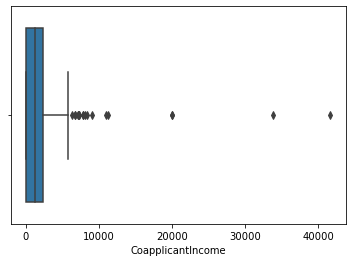

In [16]:
ax=sns.boxplot(x=Data["CoapplicantIncome"])

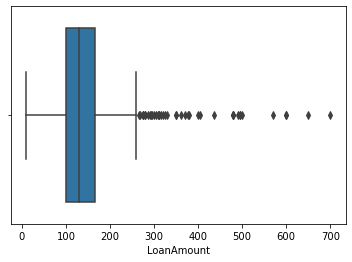

In [17]:
ax=sns.boxplot(x=Data["LoanAmount"])

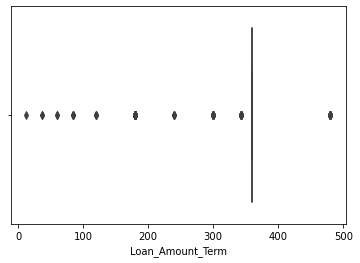

In [18]:
ax=sns.boxplot(x=Data["Loan_Amount_Term"])

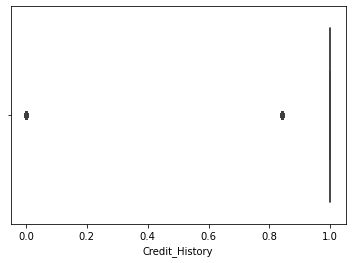

In [19]:
ax=sns.boxplot(x=Data["Credit_History"])

In [20]:
Data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
corr=Data.corr( )

In [22]:
corr

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Dependents,1.000000,0.118202,0.030430,0.163106,-0.101054,-0.037392
ApplicantIncome,0.118202,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,0.030430,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.163106,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.101054,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.037392,-0.014477,-0.001665,-0.007738,0.001395,1.000000


<AxesSubplot:>

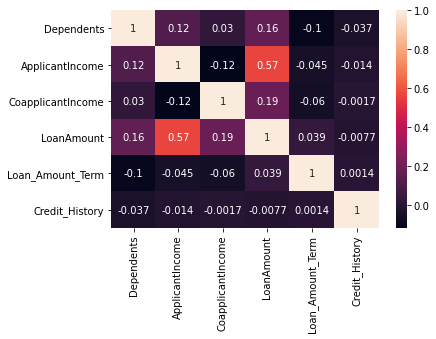

In [23]:
sns.heatmap(corr,annot=True)

###   We can see there is correlation between  `LoanAmount` and `ApplicantIncome` which means if applicant income is high loan amount issued is high
 


### <center>Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data['Gender']=le.fit_transform(Data['Gender'])
Data['Married']=le.fit_transform(Data['Married'])
Data['Education']=le.fit_transform(Data['Education'])
Data['Self_Employed']=le.fit_transform(Data['Self_Employed'])
Data['Loan_Status']=le.fit_transform(Data['Loan_Status'])
Data['Property_Area']=le.fit_transform(Data['Property_Area'])

In [25]:
from sklearn.model_selection import train_test_split
X=Data.drop(['Loan_Status'],axis=1)
y=Data['Loan_Status']

In [26]:
y.head(5)


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [27]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=240)

In [29]:
Data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


### <center> CatBoostClassifier

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
model=cat.fit(X_train, y_train)
y_pred4 = cat.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

Learning rate set to 0.007604
0:	learn: 0.6891374	total: 140ms	remaining: 2m 19s
1:	learn: 0.6847119	total: 142ms	remaining: 1m 10s
2:	learn: 0.6809239	total: 145ms	remaining: 48.1s
3:	learn: 0.6768768	total: 147ms	remaining: 36.7s
4:	learn: 0.6731352	total: 151ms	remaining: 30s
5:	learn: 0.6692851	total: 153ms	remaining: 25.4s
6:	learn: 0.6654212	total: 156ms	remaining: 22.2s
7:	learn: 0.6618310	total: 158ms	remaining: 19.6s
8:	learn: 0.6581662	total: 161ms	remaining: 17.8s
9:	learn: 0.6547775	total: 164ms	remaining: 16.3s
10:	learn: 0.6514084	total: 168ms	remaining: 15.1s
11:	learn: 0.6478344	total: 172ms	remaining: 14.2s
12:	learn: 0.6445309	total: 174ms	remaining: 13.2s
13:	learn: 0.6413605	total: 177ms	remaining: 12.4s
14:	learn: 0.6382244	total: 179ms	remaining: 11.8s
15:	learn: 0.6352791	total: 180ms	remaining: 11.1s
16:	learn: 0.6324962	total: 182ms	remaining: 10.5s
17:	learn: 0.6297464	total: 183ms	remaining: 9.99s
18:	learn: 0.6266674	total: 187ms	remaining: 9.63s
19:	learn: 

### <center> XGBoostClassifier

In [31]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred4 = xg.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[23:09:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score is:  0.7479674796747967
              precision    recall  f1-score   support

           0       0.55      0.36      0.44        33
           1       0.79      0.89      0.84        90

    accuracy                           0.75       123
   macro avg       0.67      0.63      0.64       123
weighted avg       0.73      0.75      0.73       123



C:\Users\91900\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### <center>KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
y_pred1 = knn_classifier.predict(X_test)
print("accuracy score is :",accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

accuracy score is : 0.6666666666666666
              precision    recall  f1-score   support

           0       0.30      0.18      0.23        33
           1       0.74      0.84      0.79        90

    accuracy                           0.67       123
   macro avg       0.52      0.51      0.51       123
weighted avg       0.62      0.67      0.64       123



### <center>RandomForestClassifier

In [33]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier()
model2=rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print("accuracy score is: ",accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

accuracy score is:  0.7804878048780488
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        33
           1       0.80      0.93      0.86        90

    accuracy                           0.78       123
   macro avg       0.73      0.65      0.67       123
weighted avg       0.76      0.78      0.76       123



In [34]:
Nan1=pd.read_csv('C://Users//91900//OneDrive//Desktop//Data//test.CSV')

In [35]:
Nan1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [36]:
Nan1['Gender'] = Nan1['Gender'].fillna(Nan1['Gender'].mode()[0])
Nan1['Married'] = Nan1['Married'].fillna(Nan1['Married'].mode()[0])
Nan1['Self_Employed'] = Nan1['Self_Employed'].fillna(Nan1['Self_Employed'].mode()[0])
Nan1['Dependents'] = Nan1['Dependents'].fillna(Nan1['Dependents'].mode()[0])
Nan1['LoanAmount'] = Nan1['LoanAmount'].fillna(Nan1['LoanAmount'].mean())
Nan1['Loan_Amount_Term'] = Nan1['Loan_Amount_Term'].fillna(Nan1['Loan_Amount_Term'].mean())
Nan1['Credit_History'] = Nan1['Credit_History'].fillna(Nan1['Credit_History'].mean())

In [37]:
(Nan1.isnull().sum()/Nan1.shape[0]*100)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [38]:
Nan1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [39]:
Nan1=Nan1.drop(['Loan_ID'],axis=1)

In [40]:
Nan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [41]:
Nan1.replace('3+',3,inplace=True)

In [42]:
Nan1['Dependents']=Nan1['Dependents'].astype(str).astype(int)

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Nan1['Gender']=le.fit_transform(Nan1['Gender'])
Nan1['Married']=le.fit_transform(Nan1['Married'])
Nan1['Education']=le.fit_transform(Nan1['Education'])
Nan1['Self_Employed']=le.fit_transform(Nan1['Self_Employed'])
Nan1['Property_Area']=le.fit_transform(Nan1['Property_Area'])

In [44]:
# I have used catboostclassification model becatuse i have got  83% accuracy of Catboostclassification
prediction = model2.predict(Nan1)
prediction

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [45]:
def yes_no(x):
    y_n_flag=None
    if x == 0:
        y_n_flag = "N"
    if x == 1:
        y_n_flag = "Y"
    return y_n_flag
    

In [46]:
Nan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2
364,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0


In [47]:
# Adding new column to Nan1 "predicated" with values of predicition
Nan1['predicated']=prediction

In [48]:
Nan1['Loan_status']=Nan1["predicated"].apply(yes_no)

In [49]:
Nan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,predicated,Loan_status
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2,1,Y
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2,1,Y
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2,1,Y
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2,1,Y
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.000000,2,1,Y
363,1,1,0,0,0,4158,709,115.0,360.0,1.000000,2,1,Y
364,1,0,0,0,0,3250,1993,126.0,360.0,0.825444,1,1,Y
365,1,1,0,0,0,5000,2393,158.0,360.0,1.000000,0,1,Y


In [51]:
submit1=pd.read_csv('C://Users//91900//OneDrive//Desktop//Data//test.CSV')

In [52]:
submit1.drop(submit1.iloc[:,1:12],axis = 1,inplace = True)

In [53]:
submit1["Loan_Status"] = Nan1['Loan_status']

In [54]:
submit1

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [55]:
submit1.to_csv('C://Users//91900//Desktop//loan applicant.csv', index = False)